In [1]:
%store -r X

In [2]:
%store -r y

In [3]:
%store -r df

In [4]:
import pandas as pd

In [5]:
from sklearn.decomposition import PCA

In [6]:
import numpy as np

In [7]:
from matplotlib import pyplot as plt

In [8]:
from matplotlib.colors import ListedColormap

In [9]:
from mpl_toolkits import mplot3d

In [10]:
from sklearn.preprocessing import MinMaxScaler

In [11]:
#radimo pca nad normalizovanim podacima(isti razlog kao u klasifikaciji)

In [12]:
normalScaler = MinMaxScaler()

In [13]:
normalScaler.fit(X)

MinMaxScaler()

In [14]:
X_normalized = pd.DataFrame(normalScaler.transform(X))

In [15]:
pca = PCA(n_components=48)

In [16]:
pca.fit(X_normalized)

PCA(n_components=48)

In [17]:
pca.explained_variance_ratio_

array([5.35299507e-01, 2.78547575e-01, 5.17509113e-02, 3.29228281e-02,
       2.72032928e-02, 1.97227320e-02, 1.35373541e-02, 8.08534966e-03,
       5.28386826e-03, 5.24820020e-03, 3.87689394e-03, 3.38722306e-03,
       3.19709066e-03, 2.73386205e-03, 2.11131109e-03, 1.66409119e-03,
       1.55646770e-03, 1.44952771e-03, 7.55918420e-04, 6.72864089e-04,
       4.24814610e-04, 1.36374990e-04, 9.15364875e-05, 6.31181943e-05,
       5.92462959e-05, 5.10268478e-05, 3.78732295e-05, 3.63467377e-05,
       2.33699115e-05, 1.91893423e-05, 1.55913674e-05, 9.71275892e-06,
       8.09325184e-06, 7.47504352e-06, 5.34115795e-06, 1.67515422e-06,
       1.55771303e-06, 6.20014556e-07, 8.20888727e-08, 5.95184063e-08,
       1.31436900e-08, 1.23270648e-08, 7.83435950e-10, 7.10935698e-10,
       1.50199433e-11, 1.47701053e-11, 1.16976064e-11, 1.08222866e-11])

In [18]:
coveredVariance = 0
optimalNumOfComponents = 48

x1 = []
y1 = []
x2 = []
y2 = []

for numOfComponents in range(1, 49):
    coveredVarianceByComponent = pca.explained_variance_ratio_[numOfComponents-1] * 100
    coveredVariance += coveredVarianceByComponent
    x1.append(f'pca{numOfComponents}')
    x2.append(f'{numOfComponents}')
    y1.append(coveredVarianceByComponent)
    y2.append(coveredVariance)
    print(coveredVariance, '        ', coveredVarianceByComponent)
    if coveredVariance > 95:
        optimalNumOfComponents = numOfComponents
        break
        
x1 = np.array(x1)
x2 = np.array(x2)
y1 = np.array(y1)
y2 = np.array(y2) 

53.52995066111062          53.52995066111062
81.38470820357486          27.85475754246424
86.5597993304826          5.175091126907744
89.8520821383012          3.2922828078185904
92.57241142105572          2.720329282754521
94.54468461830945          1.972273197253727
95.89842002364895          1.353735405339504


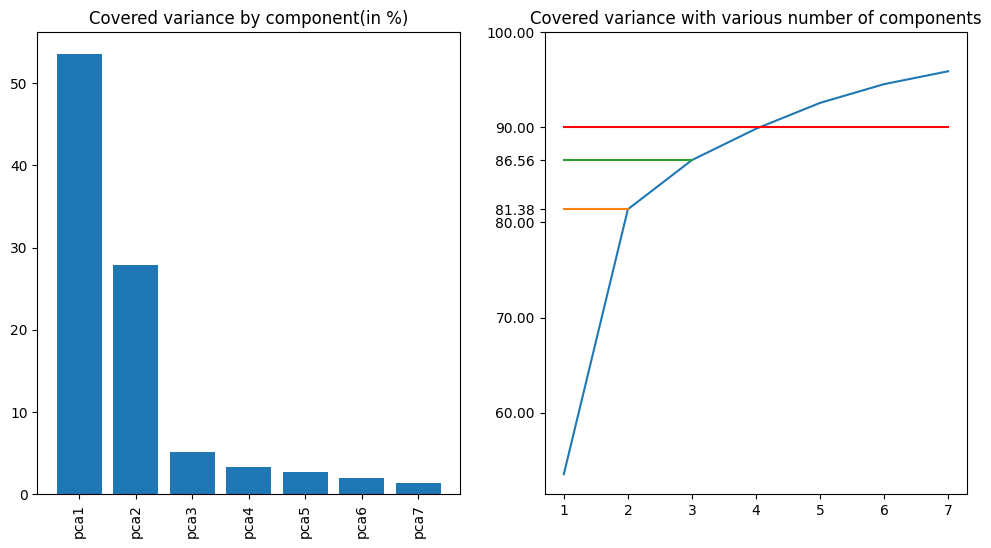

In [19]:
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(x1, y1)

plt.rcParams["figure.figsize"] = (12,6)
plt.xticks(rotation=90)

plt.title('Covered variance by component(in %)')


plt.subplot(1, 2, 2)
plt.plot(x2, y2)
plt.plot(x2, np.array([90 for i in range(len(y2))]), color='red')

plt.plot(np.array([0, 1]), [(y2[1]) for i in range(2)])
plt.plot(np.array([0, 1, 2]), [(y2[2]) for i in range(3)])

plt.yticks(list([60, 70, 80, 90, 100, y2[1], y2[2]]))

plt.title('Covered variance with various number of components')

plt.show()

In [20]:
pca3 = PCA(n_components=3)

In [21]:
pca3.fit(X_normalized)

PCA(n_components=3)

In [22]:
X_normalized_PCA3 = pd.DataFrame(pca3.transform(X_normalized))

In [23]:
X_normalized_PCA2 = X_normalized_PCA3.iloc[:, :2]
#X_normalized_PCA2

In [24]:
#vizualizujemo normalizovane podatke

In [25]:
error_categories = pd.Categorical(y)

In [26]:
color_list = ['red', 'blue', 'green', 'yellow', 'pink', 'purple', 'orange', 'brown', 'gray', 'magenta', 'cyan']

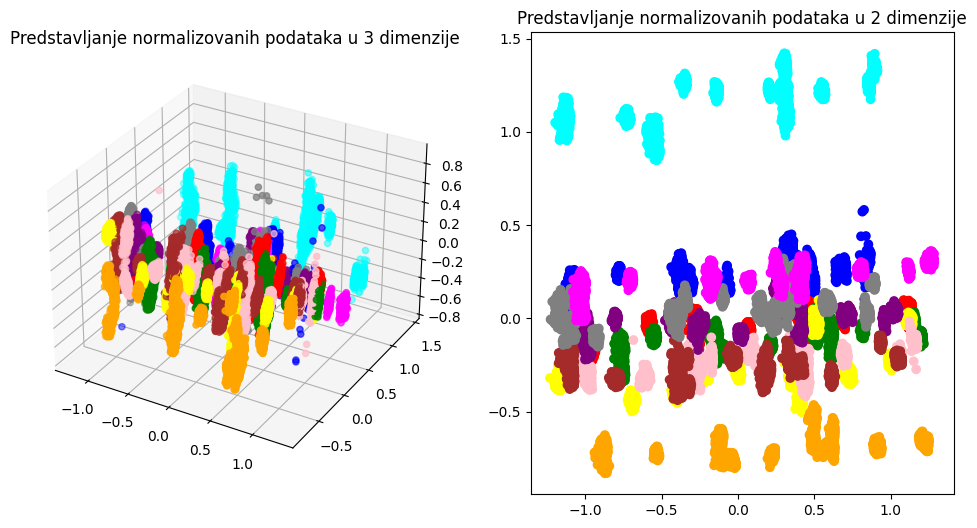

In [27]:
fig = plt.figure(figsize=(12, 6))
ax = plt.subplot(1, 2, 1, projection ='3d')
ax.scatter(X_normalized_PCA3[0], X_normalized_PCA3[1], X_normalized_PCA3[2], c = y, cmap=ListedColormap(color_list))
plt.title('Predstavljanje normalizovanih podataka u 3 dimenzije')

plt.subplot(1, 2, 2)
plt.scatter(X_normalized_PCA2[0], X_normalized_PCA2[1], c = y, cmap=ListedColormap(color_list))
plt.title('Predstavljanje normalizovanih podataka u 2 dimenzije')
plt.show()

In [28]:
%store  X_normalized

Stored 'X_normalized' (DataFrame)


In [29]:
%store  X_normalized_PCA3

Stored 'X_normalized_PCA3' (DataFrame)


In [30]:
%store X_normalized_PCA2

Stored 'X_normalized_PCA2' (DataFrame)
